In [25]:
import pandas as pd
titanic = pd.read_csv('titanic_train.csv')
titanic.head()
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [26]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [27]:
print(titanic['Sex'].unique())
#0:表示男，1表示女
titanic.loc[titanic['Sex'] == 'male','Sex'] = 0
titanic.loc[titanic['Sex'] == 'female','Sex'] = 1

['male' 'female']


In [28]:
print(titanic['Embarked'].unique())
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

['S' 'C' 'Q' nan]


In [29]:
#使用线性回归方法
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
#预测所用到的特征
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
#初始化线性回归函数
lg = LinearRegression()
#初始化K折交叉验证函数
kf = KFold(n_splits=3,shuffle=False)
predictions = []
for train,test in kf.split(titanic):
    train_predictors = titanic[predictors].loc[train,:]
    train_target = titanic['Survived'].loc[train]
    lg.fit(train_predictors,train_target)
    test_predictions = lg.predict(titanic[predictors].loc[test,:])
    predictions.append(test_predictions)

In [30]:
import numpy as np
predictions = np.concatenate(predictions,axis = 0)
# print(predictions.shape)
#匹配输出结果，1表示生存，0表示死亡
predictions[predictions > .5] = 1
predictions[predictions <= .5] = 1
accuracy = sum(predictions [predictions== titanic['Survived']]) / len(predictions)
print(accuracy)

0.3838383838383838


In [31]:
#使用逻辑回归方法
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#初始化逻辑回归函数
lr = LogisticRegression(random_state=1,solver='liblinear')
#应用交叉验证并计算精确分数
scores = cross_val_score(lr,titanic[predictors],titanic['Survived'],cv=3)
print(scores.mean())

0.7878787878787877


In [32]:
titanic_test = pd.read_csv("test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [33]:
#使用随机森林方法
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# n_estimators:数的个数
# min_samples_split:如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。
# min_samples_leaf:这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下5
rfc = RandomForestClassifier(random_state=1,n_estimators=10,min_samples_split=2,min_samples_leaf=1)
# 初始化K折交叉验证函数
kf = KFold(n_splits=3,shuffle=False)
scores = cross_val_score(rfc,titanic[predictors],titanic['Survived'],cv=kf)
print(scores.mean())

0.7856341189674523


In [34]:
# 调整参数之后的随机森林
rfc = RandomForestClassifier(random_state=1,n_estimators=100,min_samples_split=4,min_samples_leaf=2)
# 初始化K折交叉验证函数
kf = KFold(n_splits=3,shuffle=False)
scores = cross_val_score(rfc,titanic[predictors],titanic['Survived'],cv=kf)
print(scores.mean())

0.8148148148148148


In [35]:
# 生成一个家庭人数列
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
# 生成一个姓名长度series
titanic["NameLength"] = titanic["Name"].apply(lambda x:len(x))

In [36]:
import re
def get_title(name):
    # 使用正则表达式搜索标题。标题总是由大写字母和小写字母组成，以句号结尾。
    title_search = re.search(' ([A-Za-z]+)\.',name)
    # 如果标题存在，提取并返回它.
    if title_search:
        return title_search.group(1)
    return ''
# 得到所有的名字的简称（title）
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))
# 把每个title映射成整数，一些title是比较稀少的，所以被压缩成与其他标题相同的编码。
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

print(pd.value_counts(titles))
# 添加一个新的列
titanic['Title'] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Jonkheer      1
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Countess      1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


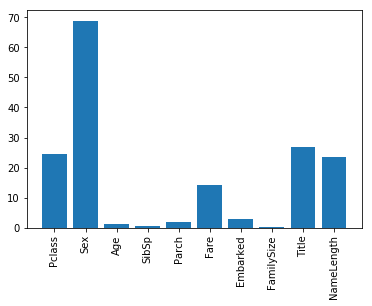

In [37]:
# 特征重要性分析
import numpy as np
from sklearn.feature_selection import SelectKBest,f_classif
# f_classif为方差分析，计算f值，利用f值这个检验统计量，可以判断假设H0是否成立：f值越大，大到一定程度时，就有理由拒绝零假设，认为不同总体下的均值存在显著差异。
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]
# 特征选择
selector = SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic['Survived'])

# 得到每一维特征的p值，把p值转化成分数
scores = -np.log10(selector.pvalues_)
# 画出分数，观察特征的分数
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()

In [38]:
# 根据上一幅图找出前四个最好的特征
predictors = ["Pclass", "Sex", "Fare", "Title"]

rfc = RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=8,min_samples_leaf=4)
scores = cross_val_score(rfc,titanic[predictors],titanic['Survived'],cv=3)
print(scores.mean())

0.8170594837261503


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

algorithms = [
    [GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"]],
    [LogisticRegression(random_state=1,solver='liblinear'), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]
# 初始化交叉熵
kf = KFold(n_splits=3,shuffle=False)
predictions = []
for train,test in kf.split(titanic):
    train_target = titanic['Survived'].loc[train]
    full_test_predictions = []
    # 使用每个算法进行预测
    for alg,predictors in algorithms:
        alg.fit(titanic[predictors].loc[train,:],train_target)
        # 在测试集上进行预测
        test_predictions = alg.predict_proba(titanic[predictors].loc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)
    
# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

0.27946127946127947


In [41]:
titles = titanic_test["Name"].apply(get_title)
# 把每个title映射成整数，一些title是比较稀少的，所以被压缩成与其他标题相同的编码。
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
titanic_test["Title"] = titles
# 得到title的组数
print(pd.value_counts(titanic_test["Title"]))

# 添加一个新的家庭大小列
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64


In [53]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"]
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]
full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions

c:\developenvironment\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.11682905, 0.47835541, 0.12614812, 0.13098152, 0.52105865,
       0.14352087, 0.64085318, 0.18003148, 0.67801347, 0.12111116,
       0.12105176, 0.20902103, 0.91068382, 0.10891264, 0.89142097,
       0.87713471, 0.16349847, 0.13907786, 0.54103225, 0.55660983,
       0.22420864, 0.53720786, 0.90572221, 0.38890591, 0.88384766,
       0.10357312, 0.90909442, 0.13746448, 0.31046235, 0.12665715,
       0.1166376 , 0.18274852, 0.55220981, 0.49648565, 0.42415294,
       0.14191047, 0.50973625, 0.524522  , 0.13270502, 0.2836669 ,
       0.11145277, 0.46618798, 0.09996496, 0.83420609, 0.89959114,
       0.14983412, 0.31593403, 0.13789616, 0.89104178, 0.54189549,
       0.35666363, 0.17718126, 0.83071945, 0.8799554 , 0.17559061,
       0.13741805, 0.10667274, 0.12343845, 0.12099732, 0.91285174,
       0.13099156, 0.15341939, 0.12993963, 0.66573198, 0.66343871,
       0.87272599, 0.67238706, 0.28826487, 0.35236563, 0.85565528,
       0.66224131, 0.12701988, 0.55390051, 0.36740453, 0.91110